In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.isna().sum()

Unnamed: 0                            0
Unnamed: 0.1                          0
Average Battery Life (in hours)    1753
Batteries                           975
Brand                                72
Card Description                    922
Chipset Brand                       297
Color                              1138
Computer Memory Type                279
Flash Memory Size                   788
Graphics Coprocessor                478
Hard Drive                          125
Hard Drive Interface                437
Item Dimensions  LxWxH              568
Item Weight                          70
Item model number                   150
Max Screen Resolution               293
Memory Speed                       1048
Number of USB 2.0 Ports            2113
Number of USB 3.0 Ports            1796
Operating System                    157
Optical Drive Type                 1785
Power Source                        956
Processor                           129
Processor Brand                     121


In [4]:
for column in df:
    if df[column].isna().sum() > 1700:
        df = df.drop(column, axis=1)

In [5]:
df.isna().sum()

Unnamed: 0                         0
Unnamed: 0.1                       0
Batteries                        975
Brand                             72
Card Description                 922
Chipset Brand                    297
Color                           1138
Computer Memory Type             279
Flash Memory Size                788
Graphics Coprocessor             478
Hard Drive                       125
Hard Drive Interface             437
Item Dimensions  LxWxH           568
Item Weight                       70
Item model number                150
Max Screen Resolution            293
Memory Speed                    1048
Operating System                 157
Power Source                     956
Processor                        129
Processor Brand                  121
Processor Count                  118
Product Dimensions               570
RAM                              279
Series                           443
Standing screen display size      88
Wireless Type                    553
p

In [6]:
Y = df['price']
X = df.drop(['price'], axis=1)

In [7]:
for i in X.columns:
    X[i].fillna(X[i].mode()[0], inplace = True)

In [8]:
print(X['Brand'].mode()[0])

HP


In [9]:
X.isna().sum()

Unnamed: 0                      0
Unnamed: 0.1                    0
Batteries                       0
Brand                           0
Card Description                0
Chipset Brand                   0
Color                           0
Computer Memory Type            0
Flash Memory Size               0
Graphics Coprocessor            0
Hard Drive                      0
Hard Drive Interface            0
Item Dimensions  LxWxH          0
Item Weight                     0
Item model number               0
Max Screen Resolution           0
Memory Speed                    0
Operating System                0
Power Source                    0
Processor                       0
Processor Brand                 0
Processor Count                 0
Product Dimensions              0
RAM                             0
Series                          0
Standing screen display size    0
Wireless Type                   0
rating                          0
Hardware Platform               0
Screen Resolut

In [10]:
X = pd.get_dummies(X, columns=X.columns)

In [11]:
Y.describe()

count         1560
unique         930
top       $399.00 
freq            19
Name: price, dtype: object

In [12]:
Y

0         $399.00 
1       $1,228.95 
2       $1,029.97 
3         $555.00 
4         $342.99 
           ...    
2597           NaN
2598           NaN
2599      $316.99 
2600           NaN
2601           NaN
Name: price, Length: 2602, dtype: object

In [13]:
y = Y.tolist()

In [14]:
y

['$399.00 ',
 '$1,228.95 ',
 '$1,029.97 ',
 '$555.00 ',
 '$342.99 ',
 '$769.95 ',
 '$205.00 ',
 '$1,074.00 ',
 '$187.00 ',
 '$379.99 ',
 '$705.00 ',
 '$228.00 ',
 '$690.00 ',
 '$505.00 ',
 nan,
 '$229.90 ',
 '$629.98 ',
 '$1,455.43 ',
 '$2,019.00 ',
 '$415.00 ',
 '$209.00 ',
 '$238.00 ',
 '$212.00 ',
 '$1,608.68 ',
 '$270.00 ',
 '$179.99 ',
 '$668.32 ',
 '$279.99 ',
 '$216.99 ',
 '$549.00 ',
 '$199.99 ',
 '$1,116.99 ',
 '$638.90 ',
 '$132.99 ',
 '$630.00 ',
 nan,
 '$1,117.00 ',
 '$1,093.66 ',
 '$1,199.99 ',
 '$1,248.90 ',
 '$714.00 ',
 '$1,499.99 ',
 '$2,489.99 ',
 nan,
 '$389.00 ',
 '$439.00 ',
 '$1,368.13 ',
 '$848.00 ',
 '$879.00 ',
 nan,
 '$1,763.66 ',
 '$459.77 ',
 '$439.00 ',
 '$595.00 ',
 '$536.00 ',
 '$758.00 ',
 '$1,984.99 ',
 '$898.99 ',
 nan,
 nan,
 nan,
 '$387.00 ',
 '$1,249.00 ',
 '$373.00 ',
 '$947.69 ',
 nan,
 nan,
 nan,
 '$1,614.99 ',
 '$360.00 ',
 '$2,045.00 ',
 '$297.99 ',
 '$1,569.00 ',
 '$763.99 ',
 '$240.00 ',
 '$595.00 ',
 nan,
 '$429.99 ',
 '$619.99 ',
 '$85.00 '

In [15]:
temp = []
for i in y:
    temp.append(str(i).replace(',', '')[1:])

In [16]:
temp

['399.00 ',
 '1228.95 ',
 '1029.97 ',
 '555.00 ',
 '342.99 ',
 '769.95 ',
 '205.00 ',
 '1074.00 ',
 '187.00 ',
 '379.99 ',
 '705.00 ',
 '228.00 ',
 '690.00 ',
 '505.00 ',
 'an',
 '229.90 ',
 '629.98 ',
 '1455.43 ',
 '2019.00 ',
 '415.00 ',
 '209.00 ',
 '238.00 ',
 '212.00 ',
 '1608.68 ',
 '270.00 ',
 '179.99 ',
 '668.32 ',
 '279.99 ',
 '216.99 ',
 '549.00 ',
 '199.99 ',
 '1116.99 ',
 '638.90 ',
 '132.99 ',
 '630.00 ',
 'an',
 '1117.00 ',
 '1093.66 ',
 '1199.99 ',
 '1248.90 ',
 '714.00 ',
 '1499.99 ',
 '2489.99 ',
 'an',
 '389.00 ',
 '439.00 ',
 '1368.13 ',
 '848.00 ',
 '879.00 ',
 'an',
 '1763.66 ',
 '459.77 ',
 '439.00 ',
 '595.00 ',
 '536.00 ',
 '758.00 ',
 '1984.99 ',
 '898.99 ',
 'an',
 'an',
 'an',
 '387.00 ',
 '1249.00 ',
 '373.00 ',
 '947.69 ',
 'an',
 'an',
 'an',
 '1614.99 ',
 '360.00 ',
 '2045.00 ',
 '297.99 ',
 '1569.00 ',
 '763.99 ',
 '240.00 ',
 '595.00 ',
 'an',
 '429.99 ',
 '619.99 ',
 '85.00 ',
 'an',
 '795.00 ',
 '670.00 ',
 '645.90 ',
 '309.00 ',
 '708.00 ',
 '165.00 

In [17]:
sum = 0.0
cnt = 0
for i in temp:
    try:
        sum += float(i)
        cnt += 1
    except:
        pass
print(sum, '  ', cnt)
avg = sum/cnt
avg

1268438.729999995    1560


813.1017499999969

In [18]:
for i in range(len(temp)):
    try:
        y[i] = float(temp[i])
    except:
        y[i] = 813.1

In [19]:
y

[399.0,
 1228.95,
 1029.97,
 555.0,
 342.99,
 769.95,
 205.0,
 1074.0,
 187.0,
 379.99,
 705.0,
 228.0,
 690.0,
 505.0,
 813.1,
 229.9,
 629.98,
 1455.43,
 2019.0,
 415.0,
 209.0,
 238.0,
 212.0,
 1608.68,
 270.0,
 179.99,
 668.32,
 279.99,
 216.99,
 549.0,
 199.99,
 1116.99,
 638.9,
 132.99,
 630.0,
 813.1,
 1117.0,
 1093.66,
 1199.99,
 1248.9,
 714.0,
 1499.99,
 2489.99,
 813.1,
 389.0,
 439.0,
 1368.13,
 848.0,
 879.0,
 813.1,
 1763.66,
 459.77,
 439.0,
 595.0,
 536.0,
 758.0,
 1984.99,
 898.99,
 813.1,
 813.1,
 813.1,
 387.0,
 1249.0,
 373.0,
 947.69,
 813.1,
 813.1,
 813.1,
 1614.99,
 360.0,
 2045.0,
 297.99,
 1569.0,
 763.99,
 240.0,
 595.0,
 813.1,
 429.99,
 619.99,
 85.0,
 813.1,
 795.0,
 670.0,
 645.9,
 309.0,
 708.0,
 165.0,
 379.0,
 499.99,
 224.99,
 419.0,
 419.0,
 684.0,
 813.1,
 499.0,
 342.67,
 1430.0,
 862.69,
 539.0,
 813.1,
 813.1,
 813.1,
 478.0,
 549.0,
 1498.0,
 419.0,
 778.0,
 813.1,
 574.99,
 813.1,
 528.0,
 769.99,
 1199.0,
 813.1,
 2116.88,
 885.0,
 409.99,
 10

In [20]:
final = []
for i in y:
    if i < 529:
        final.append(0)
    elif i < 813:
        final.append(1)
    else:
        final.append(2)

In [21]:
Y = pd.DataFrame(final, columns =['price'])

In [22]:
Y.describe()

,price
count,2602.000000
mean,1.359723
std,0.852727
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [23]:
Y

,price
0,0
1,2
2,2
3,1
4,0
...,...
2597,2
2598,2
2599,0
2600,2


In [25]:
df = pd.concat([X, Y], axis=1)

## With Label

In [26]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

Text(0, 0.5, 'plot')

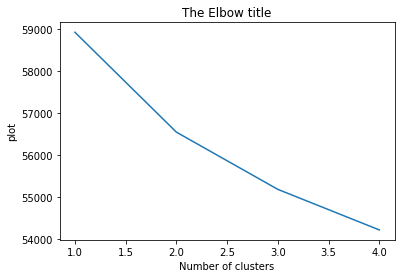

In [38]:
plot=[]
for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    plot.append(wcss_iter)

number_clusters = range(1,5)
plt.plot(number_clusters,plot)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('plot')

## Without Label

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(X)

In [ ]:
plot=[]
for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    plot.append(wcss_iter)

number_clusters = range(1,5)
plt.plot(number_clusters,plot)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('plot')